In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\omkar\AppData\Local\Temp\ipykernel_26436\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv(r'C:\Users\omkar\Downloads\Zomato data .csv')

In [3]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)

In [5]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

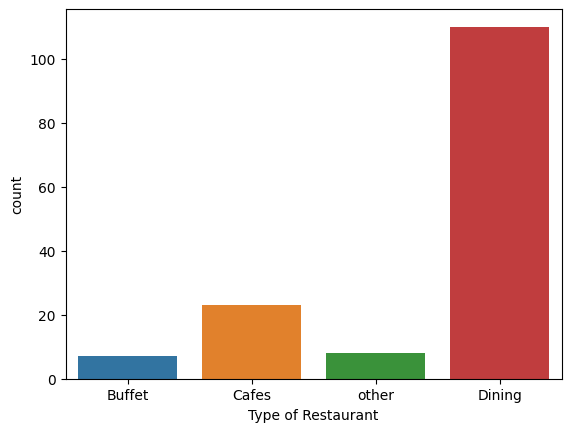

In [7]:
sns.countplot(x='listed_in(type)',hue='listed_in(type)',data=df)
plt.xlabel('Type of Restaurant')

### Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'votes')

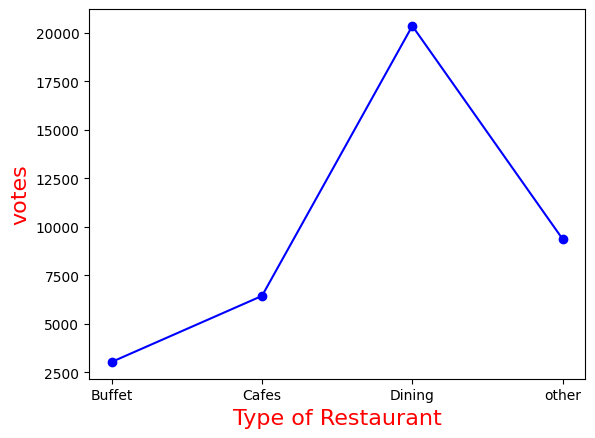

In [8]:
grouped=df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped})
plt.plot(grouped,c='blue',marker='o')
plt.xlabel('Type of Restaurant',c='red',size=16)
plt.ylabel('votes',c='red',size=16)

### Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [9]:
max_votes=df['votes'].min()

In [10]:
max_votes

0

<Axes: xlabel='online_order', ylabel='count'>

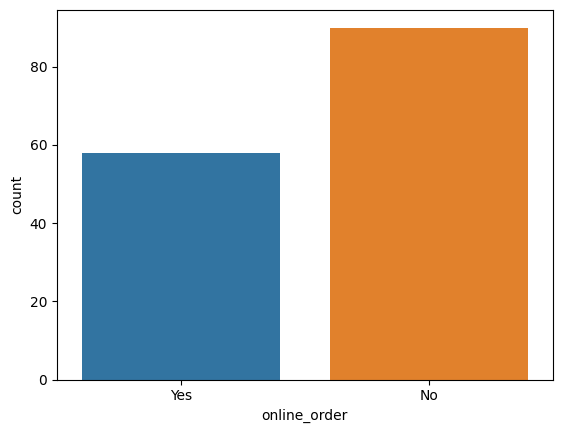

In [11]:
sns.countplot(x='online_order',hue='online_order',data=df)

### Conclusion: This suggests that a majority of the restaurants do not accept online orders.

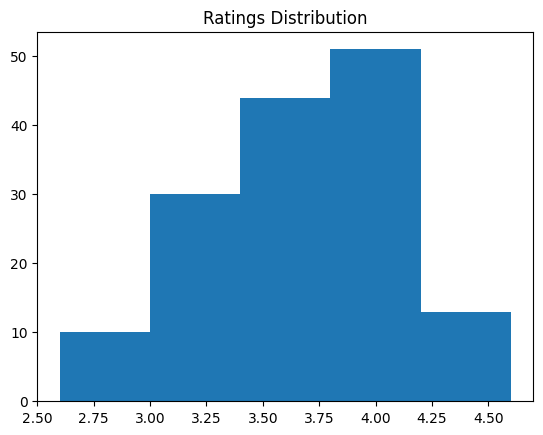

In [12]:
plt.hist(x='rate',bins=5,data=df)
plt.title('Ratings Distribution')
plt.show()

### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

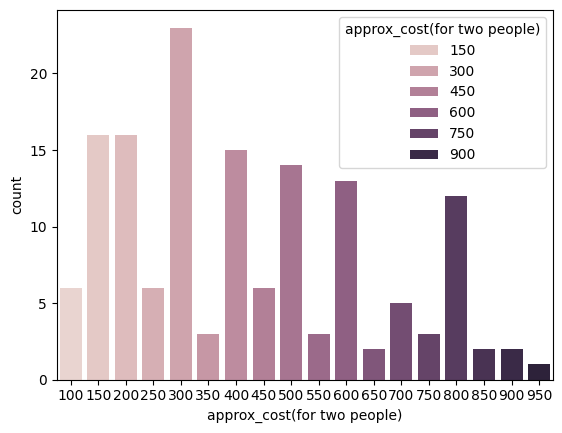

In [13]:
couple=df['approx_cost(for two people)']
sns.countplot(x= couple,hue= couple)

### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

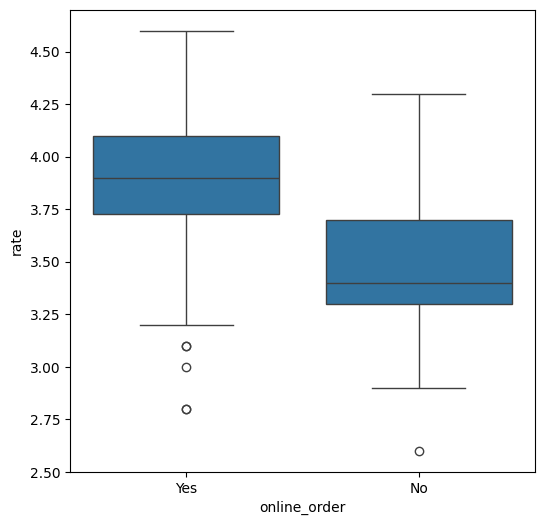

In [14]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=df)

### CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

In [15]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

### CONCLUSION: The Empire restaurant has received the maximum votes based on a given dataframe.